##

In [71]:
# Import libraries
import pandas as pd
import numpy as np
import os, json
from typing import List
import matplotlib.pyplot as plt
from statadict import parse_stata_dict

In [65]:
# declare the base path
base_path = os.getcwd()
# file subpath
file_subpath = "/../data/raw/"
# file path
file_data_values = "2002FemResp.dat.gz"
# Complete file path
complete_path = "".join([base_path, file_subpath, file_data_values])
# values column names
file_columns_names = "2002FemPreg.dct"
complete_path_column_names = "".join([base_path, file_subpath, file_columns_names])

# read the data
statadict_column_names = parse_stata_dict(complete_path_column_names)
df = pd.read_fwf(complete_path, 
                names=statadict_column_names.names,
                colspecs= statadict_column_names.colspecs,
                compression="gzip", )
df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw
0,2298,15,51,5.0,2,7,2,7,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5012,15,15,5.0,4,2,4,2,NaN,7,...,7.0,7.0,1.0,0.0,771212 52 5851120,8155 511155,NaN,NaN,NaN,NaN
2,11586,15,15,5.0,4,3,4,3,NaN,7,...,3.0,8.0,NaN,9.0,21,NaN,NaN,NaN,NaN,NaN
3,6794,55,41,5.0,1,5,1,5,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,616,15,41,5.0,2,0,2,0,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p>Dataset Description</p>

In [66]:
print(f"Dataset shape: {df.shape}")
print(f"Dataset columns description:\n")
# Number of rows in the dataset
df_rows_quantity = len(df)
print(f" Number of rows in the dataset {df_rows_quantity}")
# Print columns and its types
for k,v in df.dtypes.items():
    print(f"col_name: {k}, type: {v}")

Dataset shape: (7643, 243)
Dataset columns description:

 Number of rows in the dataset 7643
col_name: caseid, type: int64
col_name: pregordr, type: int64
col_name: howpreg_n, type: int64
col_name: howpreg_p, type: float64
col_name: moscurrp, type: int64
col_name: nowprgdk, type: int64
col_name: pregend1, type: int64
col_name: pregend2, type: int64
col_name: nbrnaliv, type: float64
col_name: multbrth, type: int64
col_name: cmotpreg, type: int64
col_name: prgoutcome, type: int64
col_name: cmprgend, type: int64
col_name: flgdkmo1, type: float64
col_name: cmprgbeg, type: object
col_name: ageatend, type: int64
col_name: hpageend, type: int64
col_name: gestasun_m, type: float64
col_name: gestasun_w, type: int64
col_name: wksgest, type: float64
col_name: mosgest, type: float64
col_name: dk1gest, type: float64
col_name: dk2gest, type: float64
col_name: dk3gest, type: float64
col_name: bpa_bdscheck1, type: float64
col_name: bpa_bdscheck2, type: int64
col_name: bpa_bdscheck3, type: float64
col_

<p>Number of empty values in the dataset with its respective percentage</p>

In [109]:
def get_df_count_nanvalues(df:pd.DataFrame):
    # create a Pandas Series with the count empty values by column
    empty_values = df.isna().sum(axis=0)
    # Create a respective percentage Pandas Series
    empty_values_percentage = empty_values.div(df_rows_quantity).mul(100)
    # Create the dataframe
    df_empty_values_cnt = pd.concat([empty_values, empty_values_percentage], axis=1).reset_index()
    df_empty_values_cnt.columns = ['col', 'cnt', 'percent']
    # Nan values over
    df_empty_values_cnt.sort_values(by='cnt', ascending=False, inplace=True)
    return df_empty_values_cnt

In [110]:
df_empty_values_cnt = get_df_count_nanvalues(df=df)
df_empty_values_cnt.head()

,col,cnt,percent
69,legagree,7642,99.986916
70,parenend,7642,99.986916
171,lbw1,7642,99.986916
170,paydeliv,7642,99.986916
169,pncarewk,7642,99.986916


<p>The columns with more than 75% of NaN values would be remove from the DB</p>

In [108]:
columns_over_75_percent = df_empty_values_cnt[df_empty_values_cnt['percent']>75]['col'].to_list()
df_1 = df.drop(columns=columns_over_75_percent)
print(f"New Dataframe Shape: {df_1.shape}")
df_1.head()

New Dataframe Shape: (7643, 74)


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,multbrth,cmotpreg,...,datend_i,datecon_i,agecon_i,fmarout5_i,pmarpreg_i,rmarout6_i,fmarcon5_i,bfeedwks_i,maternlv_i,oldwantr_i
0,2298,15,51,5.0,2,7,2,7,9,227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5012,15,15,5.0,4,2,4,2,7,1842,...,5.0,NaN,NaN,NaN,NaN,5.0,5.0,NaN,5.0,5.0
2,11586,15,15,5.0,4,3,4,3,7,843,...,5.0,NaN,NaN,NaN,NaN,5.0,5.0,NaN,5.0,5.0
3,6794,55,41,5.0,1,5,1,5,0,4215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,616,15,41,5.0,2,0,2,0,9,9120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p>Now the dataset get 74 rows available over the 243 available</p>

In [111]:
df_empty_values_cnt = get_df_count_nanvalues(df=df_1)
df_empty_values_cnt.head()

,col,cnt,percent
68,pmarpreg_i,5641,73.806097
65,datecon_i,5641,73.806097
66,agecon_i,5641,73.806097
67,fmarout5_i,5641,73.806097
22,bpa_bdscheck1,5496,71.908936


<p>Display the columns and its quantity, in groups due to the number of the columns</p>

In [151]:
def plot_histogram(val:List[float], labels:List[str]) -> None:
    """
    Plot a histogram from a Pandas Series
    Parameters
    ----------
    col: pd.Series
        Column from a dataframe
    Returns
    -------
    None
    """
    # Check the length fo the list
    if len(val) < 25:
        # Determine the number of rows for the fig and axs
        fig, axs = plt.subplots(figsize=(10,4))
        # Intanciate the matplotlin fig and axis
        fig, ax = plt.subplots(figsize=(7,3))
        ax.bar(labels, val)
    else:
        #Determine the number of columns
        nrows = int(np.ceil(len(val)/25))
        # Determine the number of rows for the fig and axs
        fig, axs = plt.subplots(nrows=nrows, ncols=1, figsize=(10,10))
        # make the multiple plot
        start_index = 0
        end_index = 25
        temp_vals = []
        temp_labels = []
        for i in range(nrows):
            print(start_index, end_index)
            if end_index > len(val):
                temp_vals = val[start_index:]
                temp_labels = labels[start_index:]
            else:
                temp_vals = val[start_index:end_index]
                temp_labels = labels[start_index:end_index]
                temp_val = end_index
                start_index = temp_val
                end_index += end_index
            axs[i].bar(temp_labels, temp_vals)
            axs[i].set_xticklabels(temp_labels, rotation=45)

    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.4, wspace=0.3)




    


0 25
25 50
50 100


C:\Users\hecto\AppData\Local\Temp\ipykernel_12140\1100009247.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(temp_labels, rotation=45)
C:\Users\hecto\AppData\Local\Temp\ipykernel_12140\1100009247.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(temp_labels, rotation=45)
C:\Users\hecto\AppData\Local\Temp\ipykernel_12140\1100009247.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(temp_labels, rotation=45)


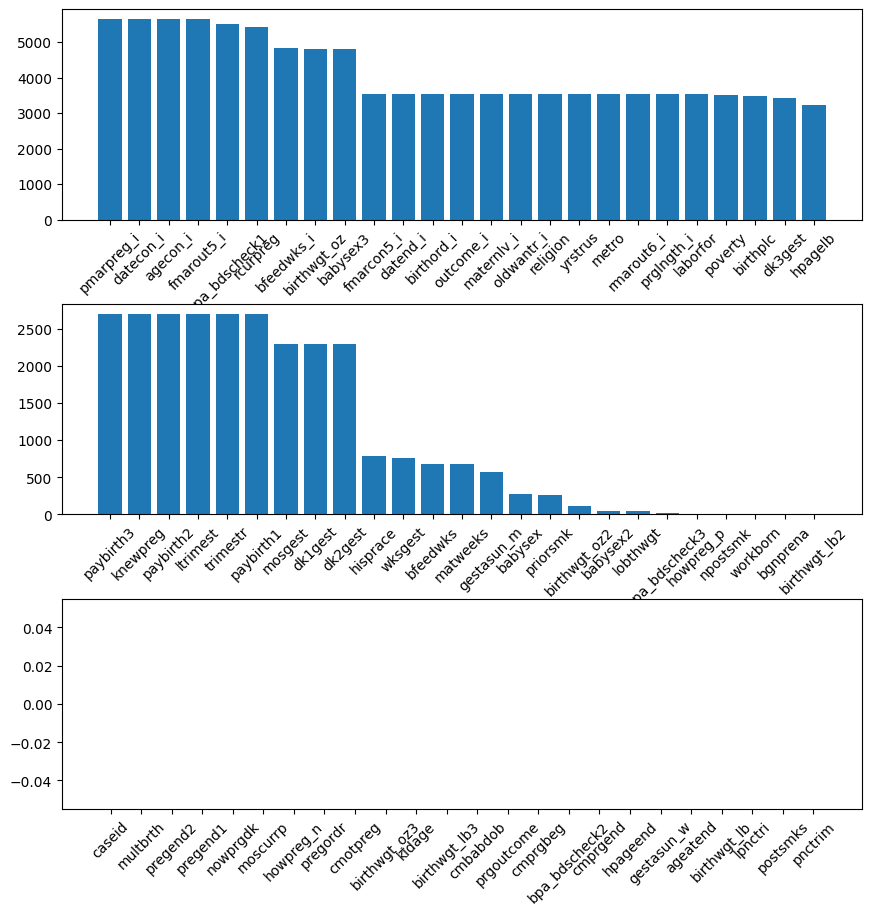

In [152]:
# Instantiate the labels
labels = df_empty_values_cnt['col'].to_list()
values = df_empty_values_cnt['cnt'].to_list()

plot_histogram(val=values, labels=labels)


<p>Split between object and numerical</p>

In [154]:
# Create two dataframes object and numerical
df_1_number = df_1.select_dtypes(include=['number'])
df_1_object = df_1.select_dtypes(exclude=['number'])

<p>Display the boxplot of numerical values to check outliers</p>

In [166]:
hist_values = df_1_number['pregordr'].value_counts()
hist_values

pregordr
15    4535
55    2919
51     119
11      70
Name: count, dtype: int64

<p>Display the distribution of the numerical columns</p>